## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
"""
Compile 模型
"""
'''
SGD(隨機梯度下降) - Arguments
•lr: float >= 0. Learning rate.
•momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
•decay: float >= 0. Learning rate decay over each update.
•nesterov: boolean. Whether to apply Nesterov momentum.
'''
sgd =keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 297us/step - loss: 0.2292 - acc: 0.9135 - val_loss: 0.2318 - val_acc: 0.9124
Epoch 2/500
50000/50000 [==============================] - 15s 296us/step - loss: 0.2289 - acc: 0.9135 - val_loss: 0.2316 - val_acc: 0.9126
Epoch 3/500
50000/50000 [==============================] - 15s 294us/step - loss: 0.2287 - acc: 0.9137 - val_loss: 0.2314 - val_acc: 0.9125
Epoch 4/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.2284 - acc: 0.9137 - val_loss: 0.2313 - val_acc: 0.9126
Epoch 5/500
50000/50000 [==============================] - 15s 304us/step - loss: 0.2282 - acc: 0.9138 - val_loss: 0.2310 - val_acc: 0.9127
Epoch 6/500
50000/50000 [==============================] - 15s 295us/step - loss: 0.2279 - acc: 0.9140 - val_loss: 0.2309 - val_acc: 0.9129
Epoch 7/500
50000/50000 [==============================] - 16s 316us/step - loss: 0.2276 - acc: 0.9139 - val_l

Epoch 59/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.2156 - acc: 0.9181 - val_loss: 0.2219 - val_acc: 0.9155
Epoch 60/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.2153 - acc: 0.9182 - val_loss: 0.2219 - val_acc: 0.9155
Epoch 61/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.2151 - acc: 0.9182 - val_loss: 0.2217 - val_acc: 0.9155
Epoch 62/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.2148 - acc: 0.9183 - val_loss: 0.2214 - val_acc: 0.9156
Epoch 63/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.2147 - acc: 0.9183 - val_loss: 0.2215 - val_acc: 0.9157
Epoch 64/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.2144 - acc: 0.9185 - val_loss: 0.2211 - val_acc: 0.9157
Epoch 65/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.2142 - acc: 0.9185 - val_loss: 0.2210 - val_acc: 0.9158
Epoch 66/500


50000/50000 [==============================] - 15s 293us/step - loss: 0.2033 - acc: 0.9223 - val_loss: 0.2151 - val_acc: 0.9177
Epoch 117/500
50000/50000 [==============================] - 15s 294us/step - loss: 0.2032 - acc: 0.9222 - val_loss: 0.2147 - val_acc: 0.9175
Epoch 118/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.2029 - acc: 0.9223 - val_loss: 0.2145 - val_acc: 0.9179
Epoch 119/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.2027 - acc: 0.9225 - val_loss: 0.2146 - val_acc: 0.9178
Epoch 120/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.2025 - acc: 0.9225 - val_loss: 0.2144 - val_acc: 0.9178
Epoch 121/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.2023 - acc: 0.9226 - val_loss: 0.2143 - val_acc: 0.9177
Epoch 122/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.2021 - acc: 0.9226 - val_loss: 0.2142 - val_acc: 0.9179
Epoch 123/500
50000/

50000/50000 [==============================] - 19s 373us/step - loss: 0.1919 - acc: 0.9263 - val_loss: 0.2098 - val_acc: 0.9193
Epoch 174/500
50000/50000 [==============================] - 16s 328us/step - loss: 0.1917 - acc: 0.9265 - val_loss: 0.2096 - val_acc: 0.9196
Epoch 175/500
50000/50000 [==============================] - 16s 316us/step - loss: 0.1914 - acc: 0.9267 - val_loss: 0.2101 - val_acc: 0.9193
Epoch 176/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1912 - acc: 0.9267 - val_loss: 0.2094 - val_acc: 0.9196
Epoch 177/500
50000/50000 [==============================] - 15s 310us/step - loss: 0.1911 - acc: 0.9268 - val_loss: 0.2097 - val_acc: 0.9191
Epoch 178/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.1908 - acc: 0.9269 - val_loss: 0.2095 - val_acc: 0.9196
Epoch 179/500
50000/50000 [==============================] - 16s 317us/step - loss: 0.1907 - acc: 0.9269 - val_loss: 0.2102 - val_acc: 0.9189
Epoch 180/500
50000/

Epoch 231/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.1805 - acc: 0.9310 - val_loss: 0.2068 - val_acc: 0.9197
Epoch 232/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.1804 - acc: 0.9310 - val_loss: 0.2066 - val_acc: 0.9200
Epoch 233/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.1802 - acc: 0.9312 - val_loss: 0.2065 - val_acc: 0.9203
Epoch 234/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.1799 - acc: 0.9313 - val_loss: 0.2068 - val_acc: 0.9200
Epoch 235/500
50000/50000 [==============================] - 14s 282us/step - loss: 0.1798 - acc: 0.9314 - val_loss: 0.2062 - val_acc: 0.9202
Epoch 236/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.1796 - acc: 0.9315 - val_loss: 0.2071 - val_acc: 0.9198
Epoch 237/500
50000/50000 [==============================] - 14s 282us/step - loss: 0.1793 - acc: 0.9316 - val_loss: 0.2066 - val_acc: 0.9202
Epoch 

Epoch 289/500
50000/50000 [==============================] - 15s 291us/step - loss: 0.1693 - acc: 0.9356 - val_loss: 0.2051 - val_acc: 0.9205
Epoch 290/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.1691 - acc: 0.9357 - val_loss: 0.2054 - val_acc: 0.9204
Epoch 291/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.1689 - acc: 0.9358 - val_loss: 0.2055 - val_acc: 0.9205
Epoch 292/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.1686 - acc: 0.9359 - val_loss: 0.2055 - val_acc: 0.9201
Epoch 293/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.1685 - acc: 0.9359 - val_loss: 0.2053 - val_acc: 0.9206
Epoch 294/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.1683 - acc: 0.9360 - val_loss: 0.2048 - val_acc: 0.9208
Epoch 295/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.1681 - acc: 0.9362 - val_loss: 0.2058 - val_acc: 0.9206
Epoch 

Epoch 347/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.1578 - acc: 0.9406 - val_loss: 0.2055 - val_acc: 0.9208
Epoch 348/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.1575 - acc: 0.9408 - val_loss: 0.2053 - val_acc: 0.9203
Epoch 349/500
50000/50000 [==============================] - 16s 315us/step - loss: 0.1572 - acc: 0.9409 - val_loss: 0.2059 - val_acc: 0.9205
Epoch 350/500
50000/50000 [==============================] - 16s 315us/step - loss: 0.1571 - acc: 0.9411 - val_loss: 0.2059 - val_acc: 0.9204
Epoch 351/500
50000/50000 [==============================] - 15s 302us/step - loss: 0.1569 - acc: 0.9410 - val_loss: 0.2053 - val_acc: 0.9207
Epoch 352/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.1566 - acc: 0.9412 - val_loss: 0.2052 - val_acc: 0.9209
Epoch 353/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.1565 - acc: 0.9413 - val_loss: 0.2060 - val_acc: 0.9205
Epoch 

Epoch 405/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.1456 - acc: 0.9459 - val_loss: 0.2075 - val_acc: 0.9204
Epoch 406/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.1456 - acc: 0.9459 - val_loss: 0.2085 - val_acc: 0.9196
Epoch 407/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.1454 - acc: 0.9460 - val_loss: 0.2081 - val_acc: 0.9201 loss: 0.14
Epoch 408/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.1451 - acc: 0.9461 - val_loss: 0.2091 - val_acc: 0.9198
Epoch 409/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.1448 - acc: 0.9461 - val_loss: 0.2089 - val_acc: 0.9197
Epoch 410/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.1447 - acc: 0.9463 - val_loss: 0.2078 - val_acc: 0.9200
Epoch 411/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.1445 - acc: 0.9463 - val_loss: 0.2088 - val_acc: 0.

50000/50000 [==============================] - 14s 273us/step - loss: 0.1339 - acc: 0.9509 - val_loss: 0.2142 - val_acc: 0.9187
Epoch 462/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.1335 - acc: 0.9513 - val_loss: 0.2151 - val_acc: 0.9188
Epoch 463/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.1334 - acc: 0.9512 - val_loss: 0.2133 - val_acc: 0.9190
Epoch 464/500
50000/50000 [==============================] - 14s 272us/step - loss: 0.1331 - acc: 0.9515 - val_loss: 0.2119 - val_acc: 0.9195
Epoch 465/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.1330 - acc: 0.9515 - val_loss: 0.2118 - val_acc: 0.9197
Epoch 466/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.1328 - acc: 0.9515 - val_loss: 0.2120 - val_acc: 0.9194
Epoch 467/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.1325 - acc: 0.9517 - val_loss: 0.2135 - val_acc: 0.9191
Epoch 468/500
50000/

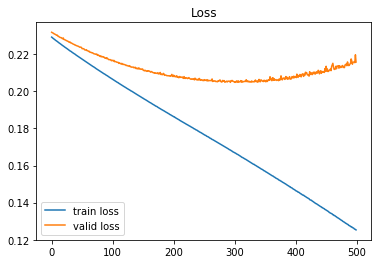

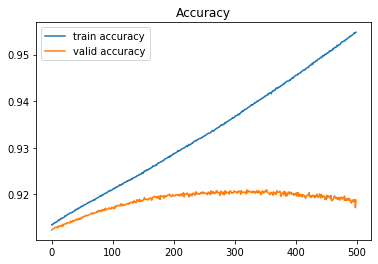

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()